#  Implementation

Now, here - instead of taking the example from the book (as we are not going to use the decision tree) I will take some another dataset. Or will generate one. 

This notebook might not include much explanation - let's go ∞

In [105]:
# Accient inputs
import numpy as np
import pandas as pd

# To generate data
from sklearn.datasets import make_classification

# To see the data
import matplotlib.pyplot as plt

# To split the data
from sklearn.model_selection import train_test_split

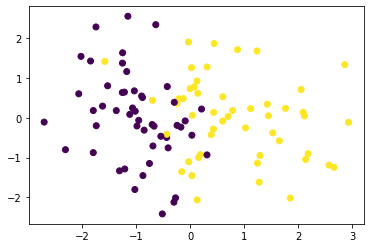

In [106]:
X, y = make_classification()
plt.scatter(X[:, 0], X[:, 1], c=y)

#### Weight initializtion
#### $ w = \frac {1} {n}$

In [107]:
weights = 1 / len(X)

In [108]:
df = pd.DataFrame({"x1": X[:, 0], 
                   "x2": X[:, 1],
                   "y": y,
                   "w": weights})

In [109]:
df

,x1,x2,y,w
0,0.021675,1.263972,1,0.01
1,1.021335,-0.251317,1,0.01
2,-1.746219,2.287903,0,0.01
3,-0.671020,-0.208818,0,0.01
4,0.782022,0.185823,1,0.01
...,...,...,...,...
95,-2.023212,1.547519,0,0.01
96,-0.130777,0.486632,1,0.01
97,-1.310812,-1.332639,0,0.01
98,-0.297337,0.391477,0,0.01


*(We will not feed the ↑ df. Insead we will keep the track of weights seperately)*

###### 

For, now we will be creating `3` models of KNN. The reason for choosing KNN is that, in KNN we have the `k` hyperparameter to set, which will let us make 3 different models (k=1, 4, 6).

***REMEMBER***: Like Bootstrap method, we will not be creating sub-samples here. The *whole* data will be fed to the algorithms (of course with changed weights). And the ***weights will not affect the learning***. So everytime all models will give the **same predictions** because the data is same. (And that is the reason why we choose to work with decision trees in AdaBoost) so, to make different model in each step, we will change the value of `k` which will endup in the different model.

# 

## Splitting the data 

In [120]:
X = df.drop("y", axis=1)
y = df["y"]

In [121]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.33)

In [122]:
weights = Xtrain.iloc[:, -1]
Xtrain = Xtrain.iloc[:, :-1]
Xtest = Xtest.iloc[:, :-1]

Of course, there will be weights for only Training data. (Don't worry we won't always have to do this manually)

###### 

#### 1. Make the model 

In [124]:
# Our model >_•
import KNN

In [125]:
model_1 = KNN.KNN(Xtrain, ytrain)

#### 2. Prediction

In [126]:
pred_1 = model_1.predict(Xtrain, k = 5)

#### 3. Get the `perror` 

In [136]:
perror_1 = np.where(pred_1 == ytrain, 0, 1)
perror_1

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1])

#### 4. Calculate Misclassification Rate 

In [137]:
def MissClf_Rate(weights, perrors):
    return (weights * perrors).sum() / weights.sum()

In [138]:
misrate = MissClf_Rate(weights, perror_1)
misrate

0.08955223880597014

####  5. Calculate the *stage* value

In [139]:
def stage(MisClfRate):
    return np.log((1 - MisClfRate) / MisClfRate) / 2

In [140]:
stage_1 = stage(misrate)
stage_1

1.1595571974726282

#### 6. Update weights

#### $ w_i = w_i \times e^{\text{stage} \times \text{perror}_i}$

In [142]:
def update_weights(weights, stage, perror):
    return weights * np.exp(stage * perror)

In [144]:
weights = update_weights(weights, stage_1, perror_1)
weights

27    0.010000
90    0.010000
43    0.010000
93    0.031885
26    0.010000
        ...   
64    0.010000
76    0.010000
41    0.010000
98    0.031885
49    0.031885
Name: w, Length: 67, dtype: float64

See? Now our weights have been updated. Those rows, which were correctly identified got less weights and those which were misclassified got high weight than before. 

#### 7. Make new model (model 2)

In [151]:
# New model
model_2 = KNN.KNN(Xtrain, ytrain)

# Predicion
pred_2 = model_2.predict(Xtrain, k = 10)

# Perror
perror_2 = np.where(pred_2 == ytrain, 0, 1)

# Misclf rate
misrate = MissClf_Rate(weights, perror_2)
misrate

0.15916516932980598

In [152]:
# Stage value for 2nd model
stage_2 = stage(misrate)
stage_2

0.8322263902394424

In [155]:
# New weights 
weights = update_weights(weights, stage_2, perror_2)
weights

27    0.010000
90    0.010000
43    0.010000
93    0.031885
26    0.010000
        ...   
64    0.010000
76    0.010000
41    0.010000
98    0.073286
49    0.031885
Name: w, Length: 67, dtype: float64

#### 7. Make new model (model 3)

In [156]:
# New model
model_3 = KNN.KNN(Xtrain, ytrain)

# Predicion
pred_3 = model_3.predict(Xtrain, k = 15)

# Perror
perror_3 = np.where(pred_3 == ytrain, 0, 1)

# Misclf rate
misrate = MissClf_Rate(weights, perror_3)
misrate

0.20329815764056813

In [157]:
# Stage value for 2nd model
stage_3 = stage(misrate)
stage_3

0.6829034252742107

In [158]:
# New weights 
weights = update_weights(weights, stage_3, perror_3)
weights

27    0.010000
90    0.010000
43    0.010000
93    0.031885
26    0.010000
        ...   
64    0.019796
76    0.010000
41    0.010000
98    0.073286
49    0.031885
Name: w, Length: 67, dtype: float64

So, now finally we have the updated weights, stages and models.

It is not enough, but later when we will make the class out of it, we will automate the repetated stuff.

## Prediction<br>—
Prediction will be done with the `predicted output (0 or 1)` and the `stage` values of each models. We will multiply the predicted output with the satage values and then add them up. If the final vlaue is less than 0 (negative) then it will belong to the 1st class otherwie 2nd.

Easy! And that will look like this ↓

    Individual Preds   = -1   1   1  -1   1  -1  -1   1
    Individual Stage   = .4  .1  .3  .2  .3  .2  .2  .4
    
    Final Pred         = (-1 x .4) + (1 x .1) + ... + (1 x .4)
    
    If Final Pred < 0 THEN predict -1
    Else predict 1

In [211]:
# Here we will have to only pass the stages and models. But I will pass ks too
# because you see all the models are same just while predicting we need to pass
# k which will make difference. So for the sake of redability I am not passing 
# ks as the 3rd argument.

# Things will be more clear when we will build the class.


stages = [stage_1, stage_2, stage_3]
models = [model_1, model_2, model_3]
ks = [5, 10, 15]

def prediction(stages, models):
    preds = None
    for stage, model, k in zip(stages, models, ks):
        pred = model.predict(Xtrain, k=k)
        if preds is None:    
            preds = np.array(pred)
        else:
            preds = np.c_[preds, pred]
    return preds

In [212]:
preds = prediction(stages, models)

In [213]:
preds[:3]

array([[1, 1, 1],
       [0, 0, 0],
       [1, 1, 1]])

In [214]:
MAIN_PRED = np.where((stages * preds).sum(1) <= 0, 0, 1)

In [215]:
(MAIN_PRED == ytrain).sum() / len(ytrain)

0.9104477611940298

Okay! We are achieving `91%` accuracy! Not bad. So, let's get into tha coding.

# 

In [279]:
class AdaBoost:
    def __init__(self, X, y, model, model_init_args={}, model_predict_args=[], n_models=5):
        X = np.array(X)
        y = np.array(y)
        if X.ndim != 2:
            raise NotImplementedError("The X must be 2D")
        if len(X) != len(y):
            raise NotImplementedError("The length mismatched")
            
        self.X = X
        self.y = y
        self.model = model
        self.model_init_args = model_init_args
        self.model_pred_args = model_predict_args
        self.weights = np.full(len(X), 1 / len(X))
        
        stages = []
        models = []
        for th_model in range(n_models):
            pred_arg = {}
            if self.model_pred_args:
                pred_arg = self.model_pred_args[th_model]
            stage, new_model = self.create_and_stage_model(pred_arg)
            stages.append(stage)
            models.append(new_model)
        self.stages = stages
        self.models = models
            
    def create_and_stage_model(self, pred_arg):
        model = self.model(self.X, self.y, **self.model_init_args)
        # Pred
        pred = model.predict(self.X, **pred_arg)
        # Perror
        perror = np.where(pred == self.y, 0, 1)
        # Mclf Rate
        misrate = MissClf_Rate(self.weights, perror)
        # Stage
        stage = self.get_stage(misrate)
        # New Weights
        self.weights = self.update_weights(stage, perror)
        return stage, model
        
    def MissClf_Rate(self, perror):
        return (self.weights * perror).sum() / self.weights.sum()
    
    def get_stage(self, MisClfRate):
        return np.log((1 - MisClfRate) / MisClfRate)
    
    def update_weights(self, stage, perror):
        return self.weights * np.exp(stage * perror)
    
    def predict(self, X):
        preds = None
        if self.model_pred_args:
            for stage, model, args in zip(self.stages, self.models, self.model_pred_args):
                pred = model.predict(X, **args)
                if preds is None:    
                    preds = np.array(pred)
                else:
                    preds = np.c_[preds, pred]
        else:
            for stage, model in zip(self.stages, self.models):
                pred = model.predict(X)
                if preds is None:    
                    preds = np.array(pred)
                else:
                    preds = np.c_[preds, pred]
        MAIN_PRED = np.where((self.stages * preds).sum(1) <= 0, 0, 1)
        return MAIN_PRED

In [296]:
model = AdaBoost(X.iloc[:, :-1], y, KNN.KNN, model_predict_args=[{"k": k} for k in np.random.randint(1, 20, 5)])

In [297]:
pred = model.predict(X.iloc[:, :-1])

In [298]:
(pred == y).sum() / len(y)

0.93

###### 

## I think done.
Hah! Of course, it is not the perfect implementation of the AdaBoost, but you know, we worked through it. Now, we know how it works. 

Great! I think this is the end of the book. And there will be the notes on completing this book in the main folder. So, see you there Aayush ∞